True

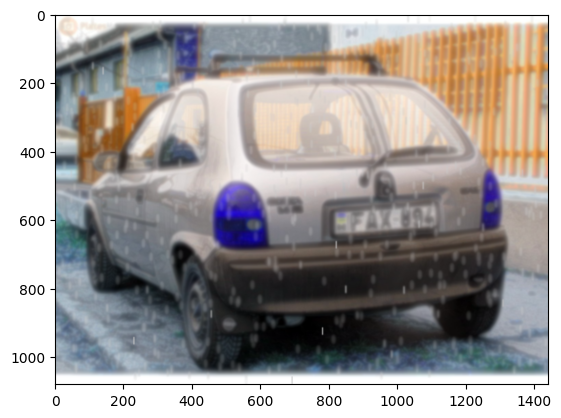

In [8]:
##RAIN

import cv2
import numpy as np
from matplotlib import pyplot as plt

def generate_random_lines(imshape,slant,drop_length,drop_num):    
    drops=[]    
    for i in range(drop_num): ## If You want heavy rain, try increasing this        
        if slant<0:            
            x= np.random.randint(slant,imshape[1])        
        else:            
            x= np.random.randint(0,imshape[1]-slant)        
        y= np.random.randint(0,imshape[0]-drop_length)        
        drops.append((x,y))    
        
    return drops

def add_rain(image, blur, drop_num):        
    imshape = image.shape    
    slant_extreme=10    
    slant= np.random.randint(-slant_extreme,slant_extreme)     
    drop_length=20    
    drop_width=2    
    drop_color=(200,200,200) ## a shade of gray    
    rain_drops= generate_random_lines(imshape,slant,drop_length,drop_num)        
    for rain_drop in rain_drops:        
        cv2.line(image,(rain_drop[0],rain_drop[1]),(rain_drop[0]+slant,rain_drop[1]+drop_length),drop_color,drop_width)    
        if blur:
            image = cv2.GaussianBlur(image,(3,3),0)  
    return image

cv2.destroyAllWindows() 

img = cv2.imread('testimg.jpg',cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_rained = add_rain(img, True, 500)

plt.imshow(img_rained)

cv2.imwrite("testimg_ligth_rained.jpg", img_rained)

#cv2.imshow("Rained", img_rained)
  
#waits for user to press any key 
#(this is necessary to avoid Python kernel form crashing)
#cv2.waitKey(0) 
  
#closing all open windows 
#cv2.destroyAllWindows() 

True

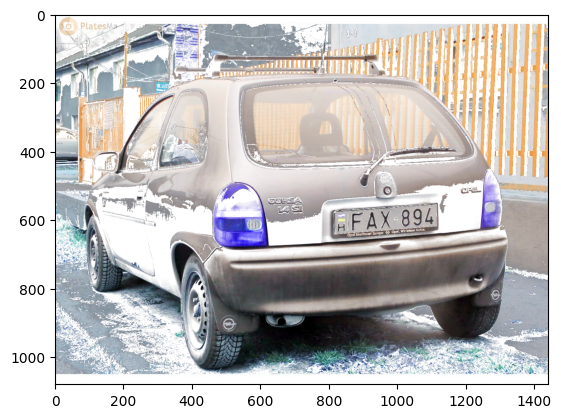

In [9]:
##SNOW

import cv2
import numpy as np
from matplotlib import pyplot as plt

def add_snow(image):
    image_HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS) ## Conversion to HLS
    image_HLS = np.array(image_HLS, dtype = np.float64)
    brightness_coefficient = 2.5
    snow_point=140 ## increase this for more snow
    image_HLS[:,:,1][image_HLS[:,:,1]<snow_point] = image_HLS[:,:,1][image_HLS[:,:,1]<snow_point]*brightness_coefficient ## scale pixel values up for channel 1(Lightness)
    image_HLS[:,:,1][image_HLS[:,:,1]>255]  = 255 ##Sets all values above 255 to 255
    image_HLS = np.array(image_HLS, dtype = np.uint8)
    image_RGB = cv2.cvtColor(image_HLS,cv2.COLOR_HLS2RGB) ## Conversion to RGB    
    return image_RGB

img = cv2.imread('testimg.jpg',cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_rained = add_snow(img)

plt.imshow(img_rained)

cv2.imwrite("testimg_snow.jpg", img_rained)

True

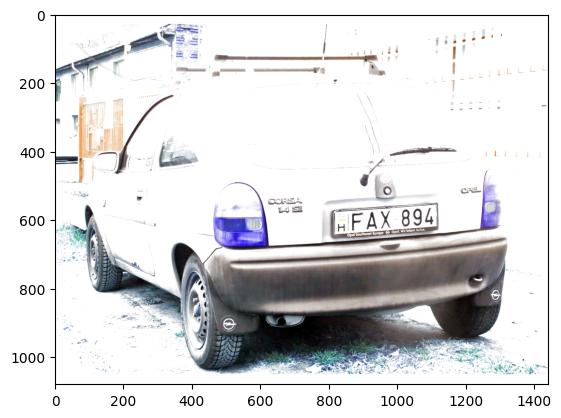

In [13]:
##SUNNY

import cv2
import numpy as np
from matplotlib import pyplot as plt

def add_brightness(image):    
    image_HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS) ## Conversion to HLS
    image_HLS = np.array(image_HLS, dtype = np.float64)
    random_brightness_coefficient = np.random.uniform()+2.0 ## generates value between 0.5 and 1.5
    image_HLS[:,:,1] = image_HLS[:,:,1]*random_brightness_coefficient ## scale pixel values up or down for channel 1(Lightness)
    image_HLS[:,:,1][image_HLS[:,:,1]>255]  = 255 ##Sets all values above 255 to 255    
    image_HLS = np.array(image_HLS, dtype = np.uint8)    
    image_RGB = cv2.cvtColor(image_HLS,cv2.COLOR_HLS2RGB) ## Conversion to RGB    
    return image_RGB
    
img = cv2.imread('testimg.jpg',cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_rained = add_brightness(img)

plt.imshow(img_rained)

cv2.imwrite("testimg_sunny.jpg", img_rained)

True

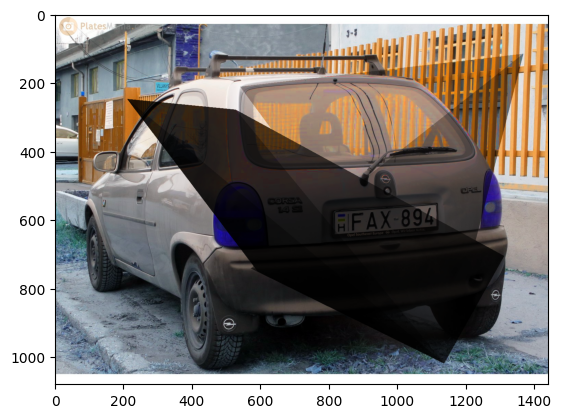

In [63]:
##SHADOWS

import cv2
import numpy as np
from matplotlib import pyplot as plt

def generate_shadow_coordinates(imshape, no_of_shadows=1):
    vertices_list=[]
    for index in range(no_of_shadows):
        vertex=[]
        for dimensions in range(np.random.randint(3,9)): ## Dimensionality of the shadow polygon
            vertex.append(( imshape[1]*np.random.uniform(),imshape[0]//15+imshape[0]*np.random.uniform()))
            vertices = np.array([vertex], dtype=np.int32) ## single shadow vertices
            vertices_list.append(vertices)
    return vertices_list ## List of shadow vertices
        
def add_shadow(image,no_of_shadows=1):
    image_HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS) ## Conversion to HLS
    mask = np.zeros_like(image)
    imshape = image.shape
    vertices_list= generate_shadow_coordinates(imshape, no_of_shadows) #3 getting list of shadow vertices
    for vertices in vertices_list:
        cv2.fillPoly(mask, vertices, 255) ## adding all shadow polygons on empty mask, single 255 denotes only red channel
        image_HLS[:,:,1][mask[:,:,0]==255] = image_HLS[:,:,1][mask[:,:,0]==255]*0.7  ## if red channel is hot, image's "Lightness" channel's brightness is lowered
    image_RGB = cv2.cvtColor(image_HLS,cv2.COLOR_HLS2RGB) ## Conversion to RGB
    return image_RGB
    
img = cv2.imread('testimg.jpg',cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_rained = add_shadow(img)

plt.imshow(img_rained)

cv2.imwrite("testimg_shadow.jpg", img_rained)